# Prototype 5: Polygon Generation Along Coastline in Bounding Box
- Author: Sharon Fitzpatrick
- Date: 1/12/2022

## Description
This prototype is meant to showcase how to generation polygons along a selected portion of a geojson coastline vector.

## The Workflow
1. The user draws a bounding box
2. The user runs the code to download the coastline vector
3. The user runs the code to clip the coastline geojson to the bounding box
4. The user runs the code to add the coastline within the bounding box to the map. (The coastline will be in yellow)
5. The user runs the code to to generate polygons along the portion of the coastline vector within the bounding box
6. The user runs the code to plot the polygons and associated markers to the map.

# Get the Bounding Box Geojson
## Directions
1. Use the square drawing button to draw a bounding box somewhere along the coast

In [1]:
from ipyleaflet import DrawControl
import leafmap
from ipyleaflet import Map, Polygon
from ipywidgets import Layout


# Empty list to hold all the polygons drawn by the user
shapes_list=[]

# Disable polyline, circle, and rectangle 
m = leafmap.Map(draw_control=False,measure_control=False, fullscreen_control=False, attribution_control=True,center=( 36.46098029888645, -121.9725021429323), zoom=3, layout=Layout(width='100%', height='100px'))

draw_control = DrawControl()

draw_control.polyline = {}
draw_control.circlemarker = {}
# Custom styles for polygons and rectangles
draw_control.polygon = {
    "shapeOptions": {
        "fillColor": "green",
        "color": "green",
        "fillOpacity": 0.2,
        "Opacity": 0.2
    },
    "drawError": {
        "color": "#dd253b",
        "message": "Ops!"
    },
    "allowIntersection": False,
    "transform":True
}

draw_control = DrawControl()
draw_control.rectangle = {
    "shapeOptions": {
        "fillColor": "green",
        "color": "green",
        "fillOpacity": 0.1,
        "Opacity": 0.1
    },
    "drawError": {
        "color": "#dd253b",
        "message": "Ops!"
    },
    "allowIntersection": False,
    "transform":True
}


# Each time a polygon is drawn it is appended to the shapeslist which is used to create the bounding box
def handle_draw(target, action, geo_json):
    if draw_control.last_action == 'created'and draw_control.last_draw['geometry']['type']=='Polygon' :
        shapes_list.append( draw_control.last_draw['geometry'])
    print("\nshapes_list: ",shapes_list)

draw_control.on_draw(handle_draw)
m.add_control(draw_control)

m


Map(center=[36.46098029888645, -121.9725021429323], controls=(ZoomControl(options=['position', 'zoom_in_text',…

# Clip the Bounding Box and Vector
---

Geojson bounds
        minx       miny        maxx       maxy
0 -125.15625  38.512579 -122.497559  40.879127



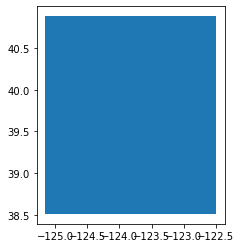

In [2]:
from shapely.geometry import shape
import geopandas as gp
if not shapes_list == []:
    geom = [shape(i) for i in shapes_list]
    geojson_bbox=gp.GeoDataFrame({'geometry':geom})
    geojson_bbox.crs='EPSG:4326'
    geojson_bbox.plot()
else:
    print("ERROR.\nYou must draw a bounding box somewhere on the coast first.")
    
print(f"Geojson bounds\n{geojson_bbox.bounds}\n")

### Download the Shorline Vector
- https://geodata.lib.berkeley.edu/catalog/stanford-xv279yj9196

In [3]:
# Import the coastline vector in but don't add it to the map
import requests
import geopandas as gp
from ipyleaflet import Map, GeoJSON
import geopandas as gpd
import json
import os

if os.path.exists("stanford-xv279yj9196.geojson"):
    with open('stanford-xv279yj9196.geojson', 'r') as f:
        coastline_vector=gp.read_file(f)
else:
    try:
        response=requests.get('https://geodata.lib.berkeley.edu/download/file/stanford-xv279yj9196-geojson.json')
        response.raise_for_status()   #Won't raise for successful requests
        coastline_vector=gp.read_file(response.content.decode("utf-8"))
    #     Alternative method
    #     coastline_vector=gp.read_file('https://geodata.lib.berkeley.edu/download/file/stanford-xv279yj9196-geojson.json')
    except requests.HTTPError as exception:
        print(f"{exception}")
    
coastline_vector    
    

,id,f_code,acc,exs,soc,geometry
0,xv279yj9196.1,BA010,1,44,USA,"MULTILINESTRING ((-96.93882 28.02606, -96.9354..."
1,xv279yj9196.2,BA010,1,44,USA,"MULTILINESTRING ((-96.91022 28.06370, -96.9123..."
2,xv279yj9196.3,BA010,1,44,USA,"MULTILINESTRING ((-96.89713 28.06679, -96.8990..."
3,xv279yj9196.4,BA010,1,44,USA,"MULTILINESTRING ((-96.88841 28.07634, -96.8849..."
4,xv279yj9196.5,BA010,1,44,USA,"MULTILINESTRING ((-96.91283 28.12183, -96.9144..."
...,...,...,...,...,...,...
3094,xv279yj9196.3095,BA010,1,44,USA,"MULTILINESTRING ((-160.08739 22.02016, -160.08..."
3095,xv279yj9196.3096,BA010,1,44,USA,"MULTILINESTRING ((-159.39618 22.22735, -159.39..."
3096,xv279yj9196.3097,BA010,1,44,USA,"MULTILINESTRING ((-130.01769 55.91194, -130.02..."
3097,xv279yj9196.3098,BA010,1,44,USA,"MULTILINESTRING ((-160.87141 56.00000, -160.86..."


### Clip the shorline vector to the bounding box

In [4]:
#clip coastal polyline
roi_coast=gpd.clip(coastline_vector, geojson_bbox)
roi_coast=roi_coast.to_crs('EPSG:4326')
roi_coast

,id,f_code,acc,exs,soc,geometry
1166,xv279yj9196.1159,BA010,1,44,USA,"MULTILINESTRING ((-123.24567 38.51258, -123.24..."
1168,xv279yj9196.1161,BA010,1,44,USA,"LINESTRING (-124.16283 40.80681, -124.16545 40..."
1169,xv279yj9196.1162,BA010,1,44,USA,"LINESTRING (-124.15833 40.81877, -124.15708 40..."


## Display the Shoreline Vector

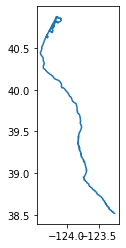

In [5]:
if not roi_coast.empty:
    roi_coast.plot()
else:
    print("ERROR.\nThe bounding box provided did not intersect with the coastline vector provided.")

### Add the coastline vector within the bounding box to the map

In [6]:
vector_within_bounding_box_json=roi_coast.to_json()
res = json.loads(vector_within_bounding_box_json)
geo_json_vector = GeoJSON(
    data=res,
    style={
        'color':'yellow','fill_color':'yellow' ,'opacity': 1, 'dashArray': '5', 'fillOpacity': 0.5, 'weight': 4
    },
    hover_style={
        'color': 'white', 'dashArray': '4', 'fillOpacity': 0.7
    },
)
m.add_layer(geo_json_vector)
m

Map(bottom=12806.0, center=[39.14710270770074, -121.67358398437501], controls=(ZoomControl(options=['position'…

# Generate Polygons along the selected portion of the coastline vector
---
1. See how the geojson looks
2. Get its bounds
3. Get the length
4. Divide the length by the number of polygons to get the distance_delta
5. Use shapely interpolate to line into segements equal distances apart (kinda)

In [7]:
# vector_within_bounding_box_geojson
vector_within_bounding_box_geojson = json.loads(vector_within_bounding_box_json)

In [8]:
# Very long output so suppress the output with ";"
vector_within_bounding_box_geojson['features'];

In [9]:
print(f"There are {len(vector_within_bounding_box_geojson['features'])} feature(s) in the bounding box")

There are 3 feature(s) in the bounding box


In [10]:
# Examine the type of the  first feature of the collection
vector_within_bounding_box_geojson['features'][0]['geometry']['type']

'MultiLineString'

# Convert the geometry of coastline within the bounding box to a list of linestrings
For each of the linestrings and the linestrings within the multilinestring coastline that make up the coastline vector add them to the list of linestrings. These linestrings will have pointers interpolated along them later

In [11]:
from shapely.geometry import LineString
lines_list=[]
length_vector_bbox_features=len(vector_within_bounding_box_geojson['features'])
length_vector_bbox_features

if(length_vector_bbox_features != 1):
    for i in range(0,length_vector_bbox_features):
        if  vector_within_bounding_box_geojson['features'][i]['geometry']['type'] == 'MultiLineString':
            for i in range(len(vector_within_bounding_box_geojson['features'][0]['geometry']['coordinates'])):
                line=LineString(vector_within_bounding_box_geojson['features'][0]['geometry']['coordinates'][i])
                lines_list.append(line)
        elif  vector_within_bounding_box_geojson['features'][i]['geometry']['type'] == 'LineString':
            line=LineString(vector_within_bounding_box_geojson['features'][i]['geometry']['coordinates'])
            lines_list.append(line)
else:
    line = LineString(vector_within_bounding_box_geojson['features'][0]['geometry']['coordinates'])
    lines_list.append(line)

In [12]:
print(f"The number of linestring in lines_list: {len(lines_list)}")

The number of linestring in lines_list: 5


## Interpolate Equal Distances Between Each Point on the Vector
For each LineString that makes up the coastline :
1. Calculate the distance between each point so that they are equally spaced
2. Create a tuple of each of the equally spaced distance points
3. Check if the linestring is closed and if it is then choose the 1st coordinate as the boundary
4. Interpolate the linestring for each of the distances points calculated earlier
5. Add the new multipoint generated by the interpolation to multipoint_list

In [13]:
from shapely.geometry import Point
from shapely.ops import unary_union
import numpy as np
# multipoint_list holds the multipoint for each feature of the coastline within the bbox
multipoint_list=[]

for i in range(len(lines_list)):
    line=lines_list[i]
    num_pts=10
    distance_delta=line.length/num_pts
    distances = np.arange(0, line.length, distance_delta)
    if lines_list[i].is_closed:
        #Its a closed shape so its boundary points are NULL
        boundary=Point(lines_list[i].coords[0])
    else: 
        boundary=lines_list[i].boundary[1]
    points = [lines_list[i].interpolate(distance) for distance in distances] + [boundary]
    multipoint = unary_union(points) 
    multipoint
    multipoint_list.append(multipoint)

C:\Users\Sharon\anaconda3\envs\coastseg\lib\site-packages\ipykernel_launcher.py:16: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  app.launch_new_instance()


## Convert the multipoint from the interpolation to a tuple
- ipyleaflet requires that the points be a tuple to be plotted onto the map

In [14]:
points_list_collection=[]
for multipoint in  multipoint_list:
    # First get each point from the multipoint object
    sample_array=[point for point in multipoint.geoms]
    # Create an empty array to hold all the points as tuples
    points_list=[]
    # For each point swap lat and lng because ipyleaflet swaps them
    for point in sample_array:
        point_tuple=(point.coords[0][1],point.coords[0][0])
        points_list.append(point_tuple)
    
    points_list_collection.append(points_list)

## Function to Convert ipyleaflet Polygon Points to GeoJson
1. Ipyleaflet draws its shapes in lat,lng format and it must be converted to lng, lat for geojson.
2. In order to correctly draw a rectangle in geojson the order of the points matters as well.

In [15]:
def convert_to_geojson(upper_right_y : float, upper_right_x: float,upper_left_y: float, upper_left_x: float,lower_left_y: float,  lower_left_x: float,lower_right_y: float,lower_right_x: float) -> dict:
    """Convert the 4 corners of the rectangle into geojson  """
    geojson_feature={}
    geojson_feature["type"]="Feature"
    geojson_feature["properties"]={}
    geojson_feature["geometry"]={}
    
    geojson_polygon={}
    geojson_polygon["type"]="Polygon"
    geojson_polygon["coordinates"]=[]
#     The coordinates(which are 1,2 arrays) are nested within a parent array
    nested_array=[]
    nested_array.append([upper_right_x, upper_right_y])
    nested_array.append([upper_left_x, upper_left_y])
    nested_array.append([lower_left_x, lower_left_y])
    nested_array.append([lower_right_x, lower_right_y])
    #GeoJson rectangles have the first point repeated again as the last point
    nested_array.append([upper_right_x, upper_right_y])

    geojson_polygon["coordinates"].append(nested_array)
    
    geojson_feature["geometry"]=geojson_polygon
    return geojson_feature

## Function to Write Polygons in GeoJson to a .geojson file
1. Pass the filename and the geojson from ***convert_to_geojson()***

In [16]:
def write_to_geojson_file(filename : str,geojson_polygons : dict):
    """Make a filename.geojson file from dictionary geojson_polygons  """
    from geojson import Point, Feature, FeatureCollection, dump
    features = []
    for geoObj in geojson_polygons["features"]:
        features.append(Feature(geometry=geoObj["geometry"]))

    feature_collection = FeatureCollection(features)

    with open(f'{filename}.geojson', 'w') as f:
        dump(feature_collection, f)

## Create a Rectangle For Each Interpolated Point on the Vector
1. Get the size from the user's size slider
2. Create a list to hold all the polygons to be added on to the map
3. Convert each of the rectangles to geojson for further analysis later using ***convert_to_geojson()***

In [17]:
from ipyleaflet import Map, Polygon
size=0.002                                         #Do we want this controlled by the user still?
new_polygon_list=[]
geojson_polygons={"type": "FeatureCollection","features":[]}

# Create a rectangle at each point on the line
# Swap the x and y for each point because ipyleaflet swaps them for draw methods
for points_list in points_list_collection:
    for point in points_list:
        # print(point)
        upper_right_x=point[0]-(size/2)
        upper_right_y=point[1]-(size/2)
        upper_left_x=point[0]+(size/2)
        upper_left_y=point[1]-(size/2)
        lower_left_x=point[0]+(size/2)
        lower_left_y=point[1]+(size/2)
        lower_right_x=point[0]-(size/2)
        lower_right_y=point[1]+(size/2)

        #NOTE: the x and y are swapped because ipyleaflet swaps the latitude and the longtitude for polygons
        new_polygon=Polygon(
        locations=[(upper_right_x, upper_right_y),(upper_left_x, upper_left_y),( lower_left_x,  lower_left_y),(lower_right_x,lower_right_y)],
        color="pink",
        fill_color="pink")

        #Append the polygon we created to the list of polygons to draw onto the map
        new_polygon_list.append(new_polygon)
        
        #Convert each set of points to geojson (DONT swap x and y this time)
        geojson_polygon=convert_to_geojson(upper_right_x, upper_right_y,upper_left_x, upper_left_y,lower_left_x,lower_left_y,lower_right_x,lower_right_y)
        geojson_polygons["features"].append(geojson_polygon)

### Optionally you can write the geojson to a file
### In the future this will have a dedicated button

In [18]:
write_to_geojson_file("test4",geojson_polygons )

## Plot the Interpolated Points as a MarkerCluster and Plot the Polygons
### Markers
    1. Each marker has the lat and lng on hover and on click as a popup
### Polygons
    1. Each polygon is a multiple of the size provided by the user

In [19]:
from ipyleaflet import LayerGroup
from ipyleaflet import Map, Marker, MarkerCluster
from ipywidgets import HTML

layers_tuple = ()
for polygon_layer in new_polygon_list:
    layers_tuple=layers_tuple + (polygon_layer,)

# Create layer group
layer_group = LayerGroup(layers=layers_tuple)

m.add_layer(layer_group)

markers = ()
for points_list in points_list_collection:
    for point in points_list:
        marker = Marker(location=point,draggable=False,title=f"Location:({point[1]},{point[0]})")
        message = HTML(value=f"Location:({point[1]},{point[0]})")
        marker.popup = message
        markers=markers + (marker,)

m.add_layer(MarkerCluster(name = "CoastSat Shoreline Data",markers = markers,))

m


Map(bottom=12806.0, center=[39.14710270770074, -121.67358398437501], controls=(ZoomControl(options=['position'…